In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

[ 000002.99 ]   0: 03-21 22:02  EbossCatalog    INFO     compmin : 0.5
[ 000002.99 ]   0: 03-21 22:02  EbossCatalog    INFO     zmin:0.8, zmax:3.5
[ 000003.04 ]   0: 03-21 22:02  EbossCatalog    INFO     151487 galaxies pass the cuts
[ 000003.05 ]   0: 03-21 22:02  EbossCatalog    INFO     % of galaxies after cut 0.60
[ 000005.05 ]   0: 03-21 22:02  EbossCatalog    INFO     compmin : 0.5
[ 000005.05 ]   0: 03-21 22:02  EbossCatalog    INFO     zmin:0.8, zmax:3.5
[ 000005.57 ]   0: 03-21 22:02  EbossCatalog    INFO     8658242 randoms pass the cuts
[ 000005.58 ]   0: 03-21 22:02  EbossCatalog    INFO     % of randoms after cut 0.72
[ 000008.22 ]   0: 03-21 22:02  numexpr.utils   INFO     Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[ 000008.22 ]   0: 03-21 22:02  numexpr.utils   INFO     NumExpr defaulting to 8 threads.


[ 000013.72 ]   0: 03-21 22:02  SystematicsPrepare INFO     available columns : Index(['nran', 'sky_g', 'sky_r', 'sky_i', 'sky_z', 'airmass', 'ebv', 'depth_g',
       'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z',
       'w1_med', 'w1_covmed', 'w1_moon', 'star_density', 'loghi', 'run',
       'depth_g_minus_ebv'],
      dtype='object')


In [7]:
rm /B/Shared/mehdi/eboss/test/*

[ 000022.10 ]   0: 03-21 22:02  SystematicsPrepare INFO     split based on [0.8, 1.5]
[ 000022.10 ]   0: 03-21 22:02  EbossCatalog    INFO     Grab a slice with [0.8, 1.5]
[ 000022.10 ]   0: 03-21 22:02  EbossCatalog    INFO     # of data that pass this cut 60740
[ 000022.72 ]   0: 03-21 22:02  EbossCatalog    INFO     Projecting to HEALPIX as galaxy with 512
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
[ 000022.83 ]   0: 03-21 22:02  EbossCatalog    INFO     Grab a slice with [0.8, 2.2]
[ 000022.87 ]   0: 03-21 22:02  EbossCatalog    INFO     # of data that pass this cut 7169801
[ 000023.85 ]   0: 03-21 22:02  EbossCatalog    INFO     Projecting to HEALPIX as random with 512
[ 000025.95 ]   0: 03-21 22:02  SystematicsPrepare INFO     df shape : (155801, 23)
[ 000025.95 ]   0: 03-21 22:02  SystematicsPrepare INFO     columns  : ['depth_g_

In [18]:
fracmin = 0.0
fracmask = randoms.hpmap > fracmin

nnbar = overdensity(data.hpmap, randoms.hpmap, fracmask) + 1

In [27]:
dataframe['ngal'] = nnbar

In [25]:
from LSSutils.stats.pcc import PCC, BTPCC

In [26]:
help(PCC)

Help on function PCC in module LSSutils.stats.pcc:

PCC(xc, yc, kind='spearman')



In [37]:
df = dataframe.dropna().to_numpy()

In [38]:
dfcorr = PCC(df[:, :-1], df[:, -1])

In [39]:
dfcorr

[-0.002002414335091633,
 -0.002895251481864315,
 -0.005589415349807417,
 -0.006016946780097513,
 0.0015849554539790654,
 -0.0017222473479968224,
 -0.0016588475637697633,
 -0.0012516341654975273,
 -0.004755755996959896,
 -0.003221748111257171,
 -0.0003692390018023999,
 0.0007215015828936875,
 0.0003518893940612726,
 -0.0018702942592474046,
 0.0003776602223715997,
 0.00022188537440931226,
 -0.0022316557548663165,
 -0.0003591689055091493,
 -0.00037452299649997386,
 0.0017797057167188283]

In [41]:
dfcorr_bs = BTPCC(df[:, :-1], df[:, -1])

In [45]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.1, 0.9, '')

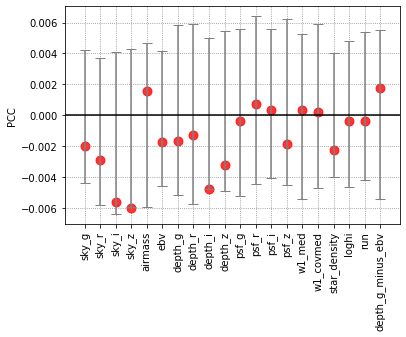

In [49]:
title = ''
fig, ax = plt.subplots()

x = np.arange(len(dfcorr))
prcntiles = np.percentile(dfcorr_bs, [0.5, 99.5], axis=0)

#ax.bar(x, self.pcc, color='crimson', alpha=0.5)
#ax.fill_between(x, y1=prcntiles[0], y2=prcntiles[1], alpha=0.2, color='b')
ax.errorbar(x, np.zeros_like(x), 
        yerr=[-prcntiles[0], prcntiles[1]], 
        alpha=1., color='grey',
        ls='None', capsize=5)

ax.scatter(x, dfcorr, 80, color='red',
       alpha=0.8, marker='o')

ax.set_xticks(x)
ax.grid(True, ls=':', color='grey')
ax.set_xticklabels(dataframe.columns[:-1], rotation=90)
ax.set(ylabel='PCC')
ax.axhline(0, color='k')
ax.text(0.1, 0.9, title, transform=ax.transAxes)



In [31]:
help(df.corr)

Help on method corr in module pandas.core.frame:

corr(method='pearson', min_periods=1) method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
    -------
    DataFrame
        

In [12]:
dataframe.to_numpy()

array([[ 0.        ,         nan,         nan, ..., 20.80267964,
                nan,         nan],
       [ 0.        ,         nan,         nan, ..., 20.78757448,
                nan,         nan],
       [ 0.        ,         nan,         nan, ..., 20.77638564,
                nan,         nan],
       ...,
       [ 0.        ,         nan,         nan, ..., 20.97504956,
                nan,         nan],
       [ 0.        ,         nan,         nan, ..., 20.95873424,
                nan,         nan],
       [ 0.        ,         nan,         nan, ..., 21.00141075,
                nan,         nan]])

In [ ]:
mv /home/mehdi/data/eboss/sysmaps/S

In [4]:
help(lab.catalogs.combinefits.EbossCatalog)

Help on class EbossCatalog in module LSSutils.catalogs.combinefits:

class EbossCatalog(builtins.object)
 |  EbossCatalog(filename, kind='galaxy', **kwargs)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, kind='galaxy', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cutz(self, zlim)
 |  
 |  make_plots(self, zcuts, filename='wsystot_test.pdf', zlim=[0.8, 3.6], slices=['low', 'high', 'zhigh'])
 |  
 |  plot_nzratio(self, zlim=[0.8, 3.6])
 |  
 |  plot_wsys(self, zcuts, slices=['low', 'high', 'zhigh'])
 |  
 |  prepare_weight(self)
 |  
 |  select(self, compmin=0.5, zmin=0.8, zmax=2.2)
 |      `Full` to `Clustering` Catalog
 |  
 |  swap(self, zcuts, slices, colname='WEIGHT_SYSTOT', clip=False)
 |  
 |  to_fits(self, filename)
 |  
 |  tohp(self, nside)
 |  
 |  writehp(self, filename, overwrite=True)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dic

In [ ]:
#!/usr/bin/env python
'''
    Update
    jan 03, switch back to v7_1
    dec 14, switch to 512
'''
import numpy as np
import pandas as pd
import logging
import os

import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils import setup_logging
from LSSutils.catalogs.combinefits import EbossCatalog, hd5_2_fits
#from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp as my_cols
from LSSutils.catalogs.datarelease import cols_eboss_mocks_qso as my_cols


setup_logging("info")


from argparse import ArgumentParser
ap = ArgumentParser(description='PREPARE EBOSS DATA FOR NN REGRESSION')
ap.add_argument('--nside',  type=int, default=512)
ap.add_argument('--cap',    type=str, default='NGC')
ap.add_argument('--target', type=str, default='QSO')
ap.add_argument('--slices', type=str, default=['low', 'high', 'all', 'zhigh', 'z1','z2', 'z3'], nargs='*')

ns = ap.parse_args()    

## --- input parameters
nside  = ns.nside
cap    = ns.cap
target = ns.target
slices = ns.slices

## --- z-cuts --- 
#zcuts     = {'0.8': [0.80, 1.14],
#             '1.1': [1.14, 1.39],
#             '1.4': [1.39, 1.63],
#             '1.6': [1.63, 1.88],
#             '1.9': [1.88, 2.20]}

#zcuts = {'all':[0.80, 2.20]}

#zcuts = {'low':[0.80, 1.50],
#        'high':[1.50, 2.20]}

zcuts = {'low':[0.8, 1.5],
         'high':[1.5, 2.2],
         'all':[0.8, 2.2],
         'zhigh':[2.2, 3.5],
         'z1':[0.8, 1.3],
         'z2':[1.3, 1.6],
         'z3':[1.6, 2.2]}


output_dir    = '/home/mehdi/data/eboss/v7_2/0.1'    
data_name_in = f'/home/mehdi/data/eboss/v7_2/eBOSS_{target}_full_{cap}_v7_2.dat.fits'
rand_name_in = f'/home/mehdi/data/eboss/v7_2/eBOSS_{target}_full_{cap}_v7_2.ran.fits'

#--- logger
# logging.basicConfig(
#     #filename=output_dir + '/test.log',
#     level=logging.INFO,
#     format="%(asctime)s:%(levelname)s:%(message)s"
#     )
logger = logging.getLogger("Logger 1")

# --- check if the output directory exists
if not os.path.isdir(output_dir):
    logger.info('create {}'.format(output_dir))
    os.makedirs(output_dir)
logger.info('results will be written under {}'.format(output_dir))    

# --- input files
logger.info('prepare the files for NN regression ')
logger.info('read {}'.format(data_name_in))
logger.info('read {}'.format(rand_name_in))

# --- imaging templates
systematics_dir  = '/home/mehdi/data/eboss/sysmaps'
systematics_name = systematics_dir + '/SDSS_WISE_HI_imageprop_nside512.h5'
dataframe = pd.read_hdf(systematics_name, key='templates')
logger.info('read {}'.format(systematics_name))

for i, key_i in enumerate(slices):
    
    if key_i not in slices:
         raise RuntimeError(f'{key_i} not in {slices}')

    logger.info('split based on {}'.format(zcuts[key_i]))

    #--- read galaxy and random 
    if key_i=='zhigh':
        zmin = 2.2
        zmax = 3.5
    else:
        zmin=0.8
        zmax=2.2

    mock   = EbossCatalog(data_name_in, 'galaxy', zmin=zmin, zmax=zmax)
    random = EbossCatalog(rand_name_in, 'random', zmin=zmin, zmax=zmax)    


    # --- prepare the names for the output files
    hpcat     = output_dir + f'/galmap_{cap}_{key_i}_{nside}.hp.fits'
    hpmask    = output_dir + f'/mask_{cap}_{key_i}_{nside}.hp.fits'
    fracgood  = output_dir + f'/frac_{cap}_{key_i}_{nside}.hp.fits'
    fitname   = output_dir + f'/ngal_features_{cap}_{key_i}_{nside}.fits'    
    fitkfold  = output_dir + f'/ngal_features_{cap}_{key_i}_{nside}.5r.npy'

    mock.cutz(zcuts[key_i])
    mock.tohp(nside)
    mock.writehp(hpcat)    
    
    ##random.apply_zcut(zcuts[key_i]) ## -- we don't cut randoms
    ##random.cutz([0.8, 2.2])
    random.tohp(nside)
    
    # --- append the galaxy and random density
    dataframe_i = dataframe.copy()
    dataframe_i['ngal'] = mock.hpmap
    dataframe_i['nran'] = random.hpmap    
    dataframe_i['nran'][random.hpmap == 0] = np.nan
    
    dataframe_i.dropna(inplace=True)
    logger.info('df shape : {}'.format(dataframe_i.shape))
    logger.info('columns  : {}'.format(my_cols))
    
    # --- write 
    hd5_2_fits(dataframe_i, 
                  my_cols, 
                  fitname, 
                  hpmask, 
                  fracgood, 
                  fitkfold,
                  res=nside, 
                  k=5)